In [ ]:
# Author: Matthew McFee
# DAT112 - Assignment #1
# July 7, 2020

# Install wget with pip and download the data files

# These should be commented in the actual .py as these are Jupyter Notebook
# specific 
# !pip install wget

# !wget "https://support.scinet.utoronto.ca/~ejspence/50x50flowers.images.npy"
# !wget "https://support.scinet.utoronto.ca/~ejspence/50x50flowers.targets.npy"

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=160bf8859a21f23400a21750cc3b5cbed5dfb25e48bdfb456356f91bd33300a7
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
--2020-07-07 05:11:13--  https://support.scinet.utoronto.ca/~ejspence/50x50flowers.images.npy
Resolving support.scinet.utoronto.ca (support.scinet.utoronto.ca)... 142.150.255.98
Connecting to support.scinet.utoronto.ca (support.scinet.utoronto.ca)|142.150.255.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81600128 (78M) [text/plain]
Saving to: ‘50x50flowers.images.npy’

50x50flowers.images 100%[===================>]  77.82M  42.6MB/s    in 1.8s    

2020-07-07 05:11:15 (42.6 MB/s) - ‘50x50flowers.images.npy’ saved [81600128/81600128]

--2020-07-07 05:11:16--  https://support.scinet.utoronto.ca/~ejspence/50x50flowers.targets.npy
Resolving support.scinet.utoronto.ca (support.scinet.utoron

In [ ]:
# Load the data files

import numpy as np

def load_data(image_path, targets_path):

  print("Reading flowers input file.")
  images = np.load(image_path)

  print("Reading flowers target file.")
  targets = np.load(targets_path)

  return images, targets

# Hardcoded file paths because the assignment guidelines said this is okay
IMAGE_PATH = "50x50flowers.images.npy"
TARGETS_PATH = "50x50flowers.targets.npy"

images, targets = load_data(IMAGE_PATH, TARGETS_PATH)

Reading flowers input file.
Reading flowers target file.


In [ ]:
# Generate training, and testing data sets

from sklearn.model_selection import train_test_split

# Setting 30% of the data to be used as the test set
# Setting random state for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(images, targets,
                                                    test_size=0.3, 
                                                    random_state=1)

# Preprocess data 

from keras.utils import to_categorical

# Odd issue where to_categorical adds an additional 18th class, solution is to 
# subtract 1 from all labels, so class labels start from 0

y_train = y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train, num_classes=17)
y_test = to_categorical(y_test, num_classes=17)

Using TensorFlow backend.


In [ ]:
# Function that builds a model 

# The model will be a simple convolutional neural network

# Import the necessary Keras libaries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# This is a simple model for part 1 to show that we have overfitting problems
def build_simple_model():
  
  print("Building network.")

  # Using a sequential model
  model = Sequential()
  
  # First convolutional layer, with input shape (50, 50, 3)
  model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(50,50,3)))

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, kernel_size=3, activation="relu"))

  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Conv2D(64, kernel_size=1, activation="relu"))

  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  # Flatten the data for final categorization
  model.add(Flatten())

  # Final classification layer, using softmax, with 17 nodes since there are 
  # 17 classes 
  model.add(Dense(17, activation="softmax"))

  return model

# This is my complex model for part 2
def build_complex_model():
  
  print("Building network.")

  # Using a sequential model
  model = Sequential()
  
  # First convolutional layer, with input shape (50, 50, 3)
  model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(50,50,3)))

  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Additional convolutional layers. I played around with the number and number
  # of filters per convolution layer. I've seen a trend of using 32 and then 64, 
  # and then 128 etc. 

  model.add(Conv2D(64, kernel_size=3, activation="relu"))

  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Conv2D(64, kernel_size=3, activation="relu"))

  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  # Flatten the data for input into a densely connect network
  model.add(Flatten())

  # Used fully connected dense layers with dropout regularization. I played 
  # around with the dropout and found 0.5 seems to regulate overfitting better
  # than other values. Strong regularization was needed as the model was 
  # overfitting badly without it.
  model.add(Dense(64, activatidoes model train on validation datadoes model train on validation dataon="relu"))

  model.add(Dropout(0.5))

  model.add(Dense(64, activation="relu"))

  model.add(Dropout(0.5))

  # Final classification layer, using softmax, with 17 nodes since there are 
  # 17 classes 
  model.add(Dense(17, activation="softmax"))

  return model

Using TensorFlow backend.


In [ ]:
model = build_complex_model()
model.summary()

In [ ]:
# These function will actually train the model on the training set, and then run
# the test data set through the trained model, and report the metrics specified 
# in the asssignment criteria

def compile_model(model, optimizer_func, loss_func, metrics):

  # Compile the model using the select optimizer function, loss function,
  # and appropriate metrics 

  model.compile(optimizer=optimizer_func, loss=loss_func, 
                metrics=metrics)
  return model

def train_and_test_model(model, X_train, X_test, y_train, y_test, epochs,
                         batch_size):

  print("Training network.")

  # We store the return values of model.fit in the history variable, for easy
  # plotting of loss  function during model training
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                      epochs=epochs, batch_size=batch_size)
  
  return history 
  

In [ ]:
# This was for the first model I tried, and I used it as a performance baseline

# Build, compile, train, and test the model

# model = build_simple_model()

# model.summary()

# These can be adjusted as needed 
# OPTIMIZER = "adam"
# LOSS_FUNC = "categorical_crossentropy"
# METRICS = ["accuracy"]

# model = compile_model(model, OPTIMIZER, LOSS_FUNC, METRICS)

# history = train_and_test_model(model, X_train, X_test, y_train, y_test, 10, 100)

# Visualize loss function as a function of epoch for model training

# import matplotlib.pyplot as plt

# plt.title("Loss vs. Epoch (Model Training)")
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.plot(history.history["loss"])
# plt.show()

In [ ]:
# Print the final test set accuracy

# print("The training score is ", history.history["loss"][-1], 
      # history.history["accuracy"][-1])

# print("The test score is", history.history["val_loss"][-1], 
      # history.history["val_accuracy"][-1])

In [ ]:
# It is clear that we are overfitting on the training set with even 
# a simple one layer convolutional network

# The purpose of this code will be to generate new training data by
# modifying existing data points in meaningful ways. Luckily, this 
# is already easy to do using Keras.

# Trying the stock Keras docs example configuration with added rescaling

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # Important to rescale data for neural networks
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

valgen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Use the fit method on the existing training data

# Train the data generator classes on the available images
datagen.fit(X_train)
valgen.fit(X_test)

# Adapt the old train and test function for use with data generators
def train_test_model_with_generator(model, datagen, X_train, y_train,
                                    X_test, y_test, epochs, batch_size):

  print("Training network.")
  
  # We store the return values of model.fit in the history variable, for easy
  # plotting of loss  function during model training
  #history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
  #                    steps_per_epoch=len(X_train)/32, 
  #                    validation_data=(X_test, y_test), 
  #                    epochs=epochs)

  #history = model.fit_generator(datagen.flow(X_train, y_train), 
                                #steps_per_epoch=313,
                                #validation_data=(X_test, y_test),
                                #epochs=epochs)

  history = model.fit_generator(datagen.flow(X_train, y_train), 
                                steps_per_epoch=313,
                                validation_data=valgen.flow(X_test, y_test),
                                epochs=epochs, verbose=0)

  return history 

Building network.
Training network.


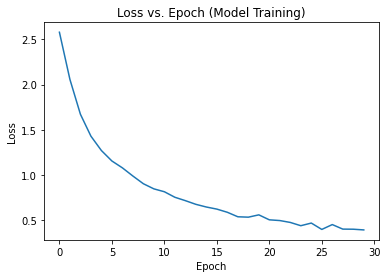

The training score is  0.3948061324763989 0.8757045
The test score is 0.9454841613769531 0.7745097875595093


In [ ]:
# Build, compile, train, and test the model

model = build_complex_model()

# These can be adjusted as needed 
# Commonly used
OPTIMIZER = "adam"
# This is a multiclass problem so this is appropriate
LOSS_FUNC = "categorical_crossentropy"
METRICS = ["accuracy"]
# After 30 epochs training loss stops changing
EPOCHS = 30
BATCH_SIZE = 32

model = compile_model(model, OPTIMIZER, LOSS_FUNC, METRICS)

history = train_test_model_with_generator(model, datagen, X_train, y_train,
                                          X_test, y_test, EPOCHS, BATCH_SIZE)

# Visualize loss function as a function of epoch for model training

import matplotlib.pyplot as plt

plt.title("Loss vs. Epoch (Model Training)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(history.history["loss"])
plt.show()

# Print the final test set accuracy

print("The training score is ", history.history["loss"][-1], 
      history.history["accuracy"][-1])

print("The test score is", history.history["val_loss"][-1], 
      history.history["val_accuracy"][-1])